In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import EnsembleVoteClassifier, StackingCVClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

from warnings import filterwarnings
filterwarnings('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('math_train.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,LE3,A,4,4,health,other,...,4,2,4,1,1,4,14,12,10,11
1,MS,F,18,R,LE3,T,4,4,teacher,services,...,5,4,3,3,4,2,4,8,9,10
2,GP,M,19,U,GT3,T,3,3,other,other,...,4,4,4,1,1,3,20,15,14,13
3,GP,F,16,U,GT3,T,3,3,other,services,...,4,3,3,2,4,5,54,11,12,11
4,GP,F,17,U,GT3,T,3,2,other,other,...,4,3,2,2,3,2,0,7,8,0


In [3]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [4]:
df.count()

school        359
sex           359
age           359
address       359
famsize       359
Pstatus       359
Medu          359
Fedu          359
Mjob          359
Fjob          359
reason        359
guardian      359
traveltime    359
studytime     359
failures      359
schoolsup     359
famsup        359
paid          359
activities    359
nursery       359
higher        359
internet      359
romantic      359
famrel        359
freetime      359
goout         359
Dalc          359
Walc          359
health        359
absences      359
G1            359
G2            359
G3            359
dtype: int64

In [5]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000,359.000000
mean,16.735376,2.752089,2.512535,1.445682,2.025070,0.334262,3.927577,3.225627,3.122563,1.462396,2.281337,3.554318,5.927577,10.813370,10.660167,10.348189
std,1.272683,1.099690,1.087889,0.682361,0.830249,0.735927,0.903310,1.003798,1.106869,0.870437,1.275669,1.384966,8.246909,3.244461,3.668734,4.535852
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,13.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,19.000000


### Checking data quality

There is no field with null or empty string value in train data.

In [6]:
np.where(pd.isnull(df))

(array([], dtype=int64), array([], dtype=int64))

In [7]:
np.where(df.applymap(lambda x: x == ''))

(array([], dtype=int64), array([], dtype=int64))

In [8]:
df.isnull().any()

school        False
sex           False
age           False
address       False
famsize       False
Pstatus       False
Medu          False
Fedu          False
Mjob          False
Fjob          False
reason        False
guardian      False
traveltime    False
studytime     False
failures      False
schoolsup     False
famsup        False
paid          False
activities    False
nursery       False
higher        False
internet      False
romantic      False
famrel        False
freetime      False
goout         False
Dalc          False
Walc          False
health        False
absences      False
G1            False
G2            False
G3            False
dtype: bool

In [9]:
df.columns[df.isnull().any()]
# df['failures'].isnull().any()

Index([], dtype='object')

In [10]:
LE = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LE.fit_transform(df[col])

df.head()
'''
Female: 0, Male: 1
'''

'\nFemale: 0, Male: 1\n'

### Feature Selection

Using Pearson correlation matrix for feature selection

The correlation coefficient has values between -1 to 1
+ A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
+ A value closer to 1 implies stronger positive correlation
+ A value closer to -1 implies stronger negative correlation

Mote about feature selection is available at [link](https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b).

In [11]:
df.corr()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
school,1.000000,-0.004165,0.373810,-0.289730,0.033911,0.040398,-0.135457,-0.055585,-0.065668,0.015067,...,-0.055975,0.036784,0.005664,0.129457,0.080155,-0.042400,-0.085299,-0.026412,-0.061788,-0.049190
sex,-0.004165,1.000000,-0.023178,-0.018588,0.086411,0.062733,0.085866,0.037919,0.207862,0.090142,...,0.069534,0.249797,0.051937,0.236617,0.242930,0.154624,-0.085219,0.097387,0.099668,0.107380
age,0.373810,-0.023178,1.000000,-0.160275,-0.004900,0.015923,-0.160768,-0.141848,-0.048419,0.006164,...,0.039167,0.033748,0.122233,0.148586,0.116525,-0.049665,0.166900,-0.070847,-0.154518,-0.181417
address,-0.289730,-0.018588,-0.160275,1.000000,0.077947,-0.053494,0.155109,0.079570,0.136075,-0.008324,...,0.015162,0.023177,0.054327,-0.084606,-0.098601,-0.041000,-0.009619,0.064912,0.134264,0.109209
famsize,0.033911,0.086411,-0.004900,0.077947,1.000000,-0.152102,-0.037756,-0.035696,0.059279,-0.081471,...,-0.045278,-0.012409,-0.002802,0.076994,0.069350,-0.024742,0.031039,0.089666,0.103955,0.094748
Pstatus,0.040398,0.062733,0.015923,-0.053494,-0.152102,1.000000,-0.126581,-0.076204,-0.050587,0.031018,...,0.003253,0.048881,0.045876,0.011685,0.046096,-0.003248,-0.142039,0.000268,-0.016439,-0.038667
Medu,-0.135457,0.085866,-0.160768,0.155109,-0.037756,-0.126581,1.000000,0.627182,0.442565,0.132935,...,0.009995,0.038161,0.070929,-0.008307,-0.055675,-0.036068,0.098116,0.213253,0.212384,0.218954
Fedu,-0.055585,0.037919,-0.141848,0.079570,-0.035696,-0.076204,0.627182,1.000000,0.233541,0.185360,...,0.009454,-0.014108,0.035836,-0.020887,-0.015631,0.029673,0.029679,0.186245,0.155741,0.147708
Mjob,-0.065668,0.207862,-0.048419,0.136075,0.059279,-0.050587,0.442565,0.233541,1.000000,0.194824,...,0.039160,0.087397,-0.019643,0.070625,-0.012880,0.058291,0.054089,0.124025,0.133662,0.132911
Fjob,0.015067,0.090142,0.006164,-0.008324,-0.081471,0.031018,0.132935,0.185360,0.194824,1.000000,...,0.025116,-0.050908,0.024274,0.084762,0.086950,-0.005218,0.028866,0.061267,0.074379,0.052930


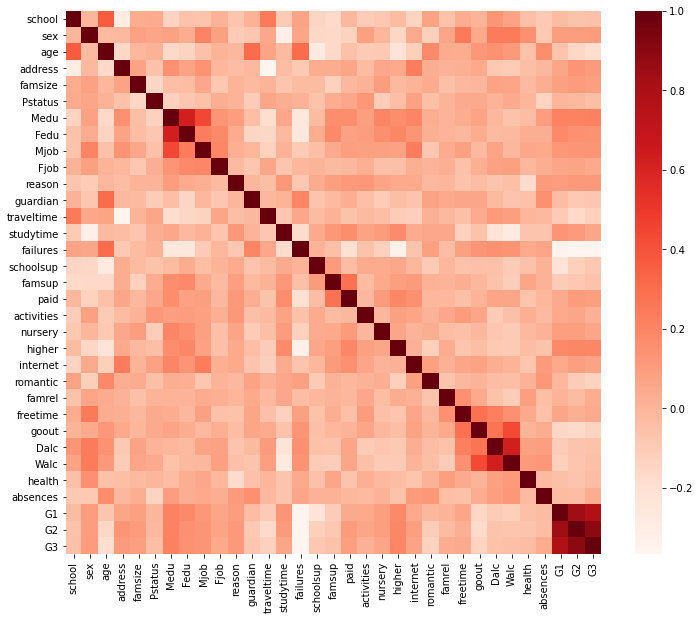

In [12]:
plt.figure(figsize=(12,10))
cor = df.corr()
# sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
sns.heatmap(cor, cmap=plt.cm.Reds)
plt.show()

In [13]:
cor_target_val = abs(cor['G3'])
relevant_features = cor['G3'][cor_target_val > 0.1]
relevant_features

sex           0.107380
age          -0.181417
address       0.109209
Medu          0.218954
Fedu          0.147708
Mjob          0.132911
reason        0.116096
traveltime   -0.125185
failures     -0.359644
higher        0.193968
romantic     -0.129356
goout        -0.140939
G1            0.786249
G2            0.897952
G3            1.000000
Name: G3, dtype: float64

In [14]:
type(relevant_features)

pandas.core.series.Series

In [15]:
relevant_features.index

Index(['sex', 'age', 'address', 'Medu', 'Fedu', 'Mjob', 'reason', 'traveltime',
       'failures', 'higher', 'romantic', 'goout', 'G1', 'G2', 'G3'],
      dtype='object')

In [16]:
df[relevant_features.index].corr()

,sex,age,address,Medu,Fedu,Mjob,reason,traveltime,failures,higher,romantic,goout,G1,G2,G3
sex,1.000000,-0.023178,-0.018588,0.085866,0.037919,0.207862,-0.097005,0.054705,0.064620,-0.150947,-0.116442,0.051937,0.097387,0.099668,0.107380
age,-0.023178,1.000000,-0.160275,-0.160768,-0.141848,-0.048419,-0.010822,0.075072,0.306453,-0.215646,0.182646,0.122233,-0.070847,-0.154518,-0.181417
address,-0.018588,-0.160275,1.000000,0.155109,0.079570,0.136075,-0.034396,-0.354969,-0.086590,0.049202,0.029286,0.054327,0.064912,0.134264,0.109209
Medu,0.085866,-0.160768,0.155109,1.000000,0.627182,0.442565,0.100631,-0.183646,-0.259730,0.161898,0.029359,0.070929,0.213253,0.212384,0.218954
Fedu,0.037919,-0.141848,0.079570,0.627182,1.000000,0.233541,0.039268,-0.150535,-0.259943,0.191696,0.026788,0.035836,0.186245,0.155741,0.147708
Mjob,0.207862,-0.048419,0.136075,0.442565,0.233541,1.000000,0.025873,-0.131760,-0.091627,0.084207,-0.076759,-0.019643,0.124025,0.133662,0.132911
reason,-0.097005,-0.010822,-0.034396,0.100631,0.039268,0.025873,1.000000,-0.039409,-0.083526,0.049984,-0.015561,-0.033957,0.102543,0.116016,0.116096
traveltime,0.054705,0.075072,-0.354969,-0.183646,-0.150535,-0.131760,-0.039409,1.000000,0.058507,-0.101009,0.018787,0.042124,-0.094804,-0.164722,-0.125185
failures,0.064620,0.306453,-0.086590,-0.259730,-0.259943,-0.091627,-0.083526,0.058507,1.000000,-0.332656,0.086941,0.131311,-0.348160,-0.367505,-0.359644
higher,-0.150947,-0.215646,0.049202,0.161898,0.191696,0.084207,0.049984,-0.101009,-0.332656,1.000000,-0.117717,-0.041325,0.186070,0.192023,0.193968


### Independent variables need to be uncorrelated with each other. If these variables are correlated with each other, then we need to keep only one of them and drop the rest.

Any two features that are correlated above 0.x (absolute value), are considered as dependent. Only keep the one that has higher correlation with target value G3. The heatmap together with features_corr matrix are the basis for independent features selection.

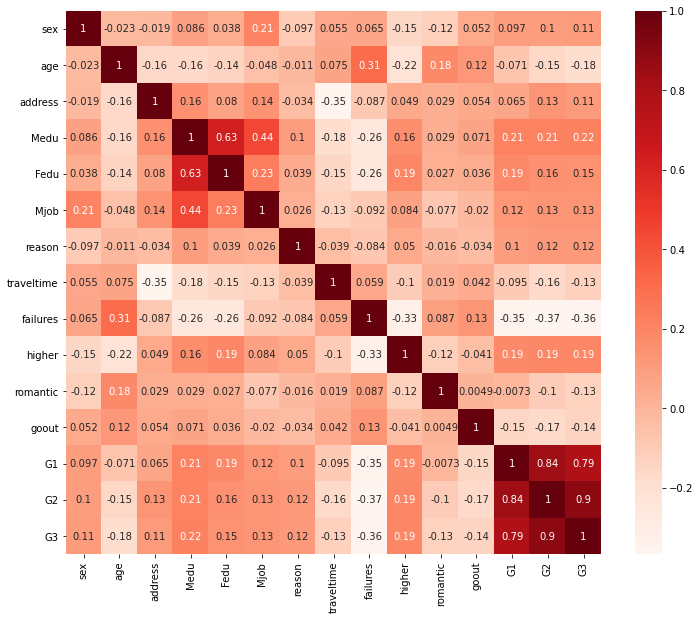

In [17]:
plt.figure(figsize=(12,10))
features_corr = df[relevant_features.index].corr()
sns.heatmap(features_corr, annot=True, cmap=plt.cm.Reds)
plt.show()

In [18]:
features_corr[(abs(features_corr) > 0.3)]

# age      < failures
# address  < traveltime
# fedu     < medu
# mjob     < medu
# higher   < failures
# failures < G1
# failures < G2


,sex,age,address,Medu,Fedu,Mjob,reason,traveltime,failures,higher,romantic,goout,G1,G2,G3
sex,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.306453,NaN,NaN,NaN,NaN,NaN,NaN
address,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,-0.354969,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medu,NaN,NaN,NaN,1.000000,0.627182,0.442565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fedu,NaN,NaN,NaN,0.627182,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mjob,NaN,NaN,NaN,0.442565,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reason,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
traveltime,NaN,NaN,-0.354969,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
failures,NaN,0.306453,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,-0.332656,NaN,NaN,-0.348160,-0.367505,-0.359644
higher,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.332656,1.000000,NaN,NaN,NaN,NaN,NaN


In [19]:
selected_features = ['sex', 'Medu', 'reason', 'traveltime','failures', 'romantic', 'goout', 'G1', 'G2', 'G3'] 

## With the features selected, making different regression models:

In [20]:
df[selected_features]

,sex,Medu,reason,traveltime,failures,romantic,goout,G1,G2,G3
0,0,4,1,1,0,1,4,12,10,11
1,0,4,0,1,0,0,3,8,9,10
2,1,3,1,1,1,1,4,15,14,13
3,0,3,1,1,0,0,3,11,12,11
4,0,3,1,1,0,1,2,7,8,0
...,...,...,...,...,...,...,...,...,...,...
354,0,1,0,1,0,0,4,14,14,13
355,1,4,3,2,0,0,3,11,13,14
356,0,1,1,1,2,1,2,15,13,13
357,0,3,0,2,2,1,2,12,0,0


In [21]:
df_features = df[['sex', 'Medu', 'reason', 'traveltime','failures', 'romantic', 'goout', 'G1', 'G2']]
df_features.head(2)

,sex,Medu,reason,traveltime,failures,romantic,goout,G1,G2
0,0,4,1,1,0,1,4,12,10
1,0,4,0,1,0,0,3,8,9


In [22]:
df_target = df[['G3']]
df_target.head(2)

,G3
0,11
1,10


In [23]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.naive_bayes import GaussianNB 
# LogisticRegression, GaussianNB

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.1, random_state=42)

# # Split the data into training/testing sets
# X_train = df_features[:-20]
# X_test = df_features[-20:]

# # Split the targets into training/testing sets
# y_train = df_target[:-20]
# y_test = df_target[-20:]


# Create linear regression object
regr_linear = linear_model.LinearRegression()
# regr = linear_model.LogisticRegression()

# Train the model using the training sets
regr_linear.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr_linear.predict(X_test)

regr_linear_y_pred = y_pred

print('Number of test values are {}'.format(len(X_test)))
# The coefficients
print('Coefficients: \n', regr_linear.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

print('Intercept of linear regression is {}'.format(regr_linear.intercept_))

Number of test values are 36
Coefficients: 
 [[ 0.08218344  0.06089754  0.05000793  0.12869291 -0.09924042 -0.34035835
   0.09528062  0.15584207  0.98463704]]
Mean squared error: 3.02
Coefficient of determination: 0.85
Intercept of linear regression is [-2.45068698]


In [25]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0818397415782477
Mean Squared Error: 3.0246638926496017
Root Mean Squared Error: 1.739156086338889


### Final linear regeression model:

As negative grades do not make sense, set the values to zero whenever a grade is predicted negative:

In [26]:
grades_pred = []
for grade in y_pred:
    if grade < 0:
        grade = 0
        grades_pred.append(grade)
    else:
        grades_pred.append(grade)
        
grades_pred

[array([9.44549739]),
 array([11.54160324]),
 array([7.31817367]),
 array([13.27892582]),
 array([18.49567166]),
 array([15.1090013]),
 array([8.77288057]),
 array([18.60150579]),
 array([14.53568036]),
 array([12.73242638]),
 array([7.14857821]),
 array([10.60510266]),
 0,
 array([18.910803]),
 array([10.78709125]),
 array([14.84626901]),
 array([3.51764803]),
 array([14.15739264]),
 array([11.13492676]),
 array([13.08288241]),
 array([13.36805208]),
 array([13.93375521]),
 array([6.53883674]),
 array([8.93374899]),
 array([9.55177638]),
 array([10.86400802]),
 array([10.29791053]),
 array([7.99474711]),
 array([5.80652585]),
 array([10.4779348]),
 array([11.88698794]),
 array([15.21352574]),
 array([9.57339838]),
 array([5.19526508]),
 array([9.20999956]),
 array([15.49208868])]

In [27]:
# df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# df_compare
# df_compare = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
# df_compare
# df_compare = pd.DataFrame( {'Actual': y_test, 'Predicted': y_pred}, index=list(range(36)))
# df_compare

### Checking test dataset and applying linear regressor

In [28]:
df_test = pd.read_csv('math_test.csv')
df_test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,GP,M,15,R,GT3,T,2,1,health,services,...,yes,5,4,2,1,1,5,8,9,9
1,GP,F,18,U,LE3,T,2,1,services,at_home,...,yes,5,4,3,1,1,5,12,12,12
2,GP,M,16,U,LE3,T,1,2,other,other,...,no,4,4,4,2,4,5,0,7,0
3,MS,F,18,U,LE3,T,3,1,teacher,services,...,no,4,3,4,1,1,1,0,7,9
4,GP,F,17,U,GT3,T,3,2,health,health,...,no,5,2,2,1,2,5,0,17,17


In [29]:
# Lable encoding non numeric values
df_test.isnull().any()
for col in df_test.columns:
    if df_test[col].dtype == 'object':
        df_test[col] = LE.fit_transform(df_test[col])

df_test.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2
0,0,1,15,0,0,1,2,1,1,3,...,1,5,4,2,1,1,5,8,9,9
1,0,0,18,1,1,1,2,1,3,0,...,1,5,4,3,1,1,5,12,12,12
2,0,1,16,1,1,1,1,2,2,2,...,0,4,4,4,2,4,5,0,7,0
3,1,0,18,1,1,1,3,1,4,3,...,0,4,3,4,1,1,1,0,7,9
4,0,0,17,1,0,1,3,2,1,1,...,0,5,2,2,1,2,5,0,17,17


In [30]:
df_test = df_test[['sex', 'Medu', 'reason', 'traveltime','failures', 'romantic', 'goout', 'G1', 'G2']]
df_test.head()

,sex,Medu,reason,traveltime,failures,romantic,goout,G1,G2
0,1,2,3,1,0,1,2,9,9
1,0,2,3,1,1,1,3,12,12
2,1,1,0,2,1,0,4,7,0
3,0,3,0,1,0,0,4,7,9
4,0,3,3,1,0,0,2,17,17


regr_linear_y_pred = regr_linear.predict(df_test)


### Ridge Linear Regression

In [31]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.1, random_state=42)

# Create ridge linear regression object
regr_ridge = linear_model.Ridge(alpha=10.0)

# Train the model using the training sets
regr_ridge.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr_ridge.predict(X_test)

regr_ridge_y_pred = y_pred

print('Number of test values are {}'.format(len(X_test)))
# The coefficients
print('Coefficients: \n', regr_ridge.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

print('Intercept of linear regression is {}'.format(regr_ridge.intercept_))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Number of test values are 36
Coefficients: 
 [[ 0.07844305  0.05854212  0.04923532  0.11624127 -0.09752446 -0.30313067
   0.09291368  0.16060307  0.97906147]]
Mean squared error: 3.05
Coefficient of determination: 0.85
Intercept of linear regression is [-2.42229153]
Mean Absolute Error: 1.083317324880504
Mean Squared Error: 3.0453253708221975
Root Mean Squared Error: 1.7450860640158117


In [32]:
# regr_ridge_y_pred = regr_ridge.predict(df_test)

### Logistic Regression

Further explaination is available at [link](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a).

In [33]:
X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.1, random_state=42)

# Create logistic regression object
logisticRegr = LogisticRegression()

logisticRegr.fit(X_train, y_train)

y_pred = logisticRegr.predict(X_test)

logregr_y_pred = y_pred

# Use score method to get accuracy of model
score = logisticRegr.score(X_test, y_test)
print('Score of logistic regression is {}'.format(score))

# The coefficients
print('Coefficients: \n', logisticRegr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

print('Intercept of linear regression is {}'.format(logisticRegr.intercept_))

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Score of logistic regression is 0.2777777777777778
Coefficients: 
 [[ 0.00718042  0.19232507 -0.17009651  0.94056983  0.81609976  0.82806973
   0.04752564  0.49712262 -0.97194919]
 [-0.30809923  1.10093208  1.09207408 -0.11454013  1.18299203  0.51355026
   1.38252094 -1.00415438 -0.87044504]
 [ 0.47162131  0.7174911  -0.28785573  0.00204889  0.47319692  0.10548764
   1.42489506 -0.31740241 -0.60457114]
 [-0.98208154  0.76388507  0.37041024  1.60822539 -1.37498235 -1.05088461
   0.79613015 -0.11609781 -0.76084123]
 [ 0.38731259  0.74389244  0.1844521   1.29694338  1.44192754  0.72780367
   0.16851661 -0.22004619 -0.39339428]
 [ 0.56437968  0.04557197  0.23596235  0.93009745  0.64158526 -0.14559646
   0.78680243 -0.40921242 -0.05836889]
 [-0.3954263   0.27949066 -0.12155887  0.46894163  0.61584468  0.34100163
   0.36818391  0.21381243 -0.35867522]
 [ 0.27992664 -0.19744458  0.10454303  0.98131227  0.23893604 -0.24540247
   0.05560212 -0.0287342  -0.0283478 ]
 [-0.15011178 -0.1766798  -0.

In [34]:
logisticRegr.predict(df_test)
# logregr_y_pred = y_pred
# logregr_y_pred

array([12, 13,  0, 11, 17, 11, 15, 11,  8,  0,  8, 10, 14, 11,  7, 15, 10,
       16, 10, 10, 14, 15,  0, 15, 13, 15,  0, 11, 15, 10, 15, 11, 15,  0,
       10,  7], dtype=int64)

### Random forest

More info at [link](https://stackabuse.com/random-forest-algorithm-with-python-and-scikit-learn/).

Random forest with 20 trees:

In [53]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor


X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.1, random_state=42)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# n_estimator is number of trees in the random forest
regressor_n20 = RandomForestRegressor(n_estimators=20, random_state=0)
regressor_n20.fit(X_train, y_train)
y_pred = regressor_n20.predict(X_test)

rf_20_y_pred = y_pred

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.093055555555556
Mean Squared Error: 4.219513888888889
Root Mean Squared Error: 2.054145537416687


In [54]:
regressor_n20.predict(df_test)

array([18.65, 18.65, 11.75, 18.75, 18.75, 18.65, 18.75, 18.75, 18.75,
       18.65, 18.7 , 18.75, 18.75, 18.75, 18.6 , 18.7 , 18.85, 18.75,
       18.75, 18.85, 18.65, 18.75, 18.6 , 18.75, 18.7 , 18.7 , 11.95,
       18.75, 18.7 , 18.7 , 18.75, 18.75, 18.75, 18.65, 18.75, 18.75])

### Random forest with 200 trees:

In [55]:
regressor_n200 = RandomForestRegressor(n_estimators=200, random_state=0)
regressor_n200.fit(X_train, y_train)
y_pred = regressor_n200.predict(X_test)

rf_200_y_pred = y_pred

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.062490740740741
Mean Squared Error: 3.417483706790123
Root Mean Squared Error: 1.848643747937964


In [56]:
regressor_n200.predict(df_test)

array([18.55 , 18.535, 11.465, 18.66 , 18.635, 18.545, 18.635, 18.645,
       18.68 , 18.53 , 18.655, 18.645, 18.635, 18.66 , 18.52 , 18.635,
       18.765, 18.68 , 18.65 , 18.81 , 18.55 , 18.68 , 18.575, 18.645,
       18.635, 18.635, 11.82 , 18.68 , 18.625, 18.61 , 18.65 , 18.66 ,
       18.66 , 18.55 , 18.635, 18.63 ])

### Random forest with 120 trees, max_depth = 3

In [61]:
rfclf_n120_d3 = RandomForestRegressor(random_state=2020, max_depth=3, min_samples_split=3, n_estimators=120, max_features=0.9)

rfclf_n120_d3.fit(X_train, y_train)

y_pred = rfclf_n120_d3.predict(X_test)

rf_120_maxdepth_3_y_pred = y_pred

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.0800307666807023
Mean Squared Error: 3.0022207972973667
Root Mean Squared Error: 1.732691777927444


In [62]:
rfclf_n120_d3.predict(df_test)

array([17.51358481, 17.51358481, 11.54747192, 17.51358481, 17.51358481,
       17.51358481, 17.51358481, 17.51358481, 17.51358481, 17.51358481,
       17.51358481, 17.51358481, 17.51358481, 17.51358481, 17.51358481,
       17.51358481, 17.51358481, 17.51358481, 17.51358481, 17.51358481,
       17.51358481, 17.51358481, 17.51358481, 17.51358481, 17.51358481,
       17.51358481, 11.54747192, 17.51358481, 17.51358481, 17.51358481,
       17.51358481, 17.51358481, 17.51358481, 17.51358481, 17.51358481,
       17.51358481])

### Random forest with 120 trees, max_depth = 5

In [70]:
rfclf_n200_d55 = RandomForestRegressor(random_state=2020,max_depth=5, min_samples_split=2, n_estimators=200, max_features=0.9)

rfclf_n200_d55.fit(X_train, y_train)
y_pred = rfclf_n200_d55.predict(X_test)

rf_200_maxdepth_5_y_pred = y_pred

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9859440627721265
Mean Squared Error: 2.9514154281971225
Root Mean Squared Error: 1.7179684013965806


In [71]:
rfclf_n200_d55.predict(df_test)

array([ 8.36217381, 11.9504906 ,  0.208066  ,  7.84597253, 17.36650547,
       11.66703921, 18.20054376, 13.08086269,  7.84372693,  5.48235973,
        8.4871918 ,  7.61564311, 15.30787828,  9.94173906,  6.70607153,
       16.22806922,  5.82087091, 18.57126003, 10.23365269, 11.69043961,
       13.37409282, 18.25456541,  7.17205163, 11.79628118, 15.39131257,
       16.07321079,  0.81411442,  9.64482393, 17.37544634,  8.80048723,
       18.65075595,  8.32725798, 15.39456122,  7.47164394,  8.11121131,
        6.32780183])

### Gaussian Bayes

[link](https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn)

In [67]:
from sklearn.naive_bayes import GaussianNB



X_train, X_test, y_train, y_test = train_test_split(df_features, df_target, test_size=0.1, random_state=42)

#Create a Gaussian Classifier
gnb = GaussianNB()

#Train the model using the training sets
gnb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = gnb.predict(X_test)

gnb_y_pred = y_pred

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.1388888888888888
Mean Squared Error: 4.25
Root Mean Squared Error: 2.0615528128088303


In [68]:
gnb.predict(df_test)

array([ 9, 12,  0,  6, 19, 11, 19, 14,  6,  6,  7,  6, 16, 11,  8, 16,  6,
       19, 11, 11, 14, 19,  0, 12, 18, 16,  0, 10, 18, 10, 19, 10, 16,  9,
        6,  7], dtype=int64)

## Averaging all results

#### Averging the results of linear regression models, ridge regression, logistic regression, random forest (with different parameters), gaussian bayes regression.

This means taking the average of the following prediction models:

+ regr_linear_y_pred: predicted G3 by linear regression
+ regr_ridge_y_pred:  predicted G3 by ridge linear regression
+ logregr_y_pred:  predicted G3 by logistic regression
+ rf_20_y_pred:  predicted G3 by random forest regression with 20 tress and default values
+ rf_200_y_pred: predicted G3 by random forest regression with 200 tress and default values
+ rf_120_maxdepth_3_y_pred:  predicted G3 by random forest regression with 120 tress and max depth of 3
+ rf_200_maxdepth_5_y_pred: predicted G3 by random forest regression with 200 tress and max depth of 5
+ gnb_y_pred: predicted G3 by Gaussian Bayes regression  

#### Mean absolute and mean square error are calculated afterwards.

In [72]:
y_pred_avg = []
for i in range(len(logregr_y_pred)):
    y_pred_avg.append((regr_linear_y_pred[i][0] + regr_ridge_y_pred[i][0] + logregr_y_pred[i] 
                       + rf_20_y_pred[i]+ rf_200_y_pred[i] + rf_120_maxdepth_3_y_pred[i] 
                       + rf_200_maxdepth_5_y_pred[i] + gnb_y_pred[i] ) / 8)
y_pred_avg

[9.687156363864837,
 11.6969377396837,
 7.7665580487925885,
 12.837623123399052,
 17.915757772793874,
 15.279093906044315,
 8.73636553388138,
 17.9264621748902,
 14.423291937986104,
 13.132196187042549,
 7.4664832572501485,
 11.006183009986753,
 0.9580922879976512,
 17.319129353124318,
 10.935208213681342,
 15.259987749699112,
 3.0401893985457162,
 14.348126617997378,
 11.937714265178261,
 12.732220245992151,
 12.66917928638833,
 14.434555556505748,
 7.604159401868596,
 8.014045009208854,
 9.795808293402416,
 10.982308207131133,
 9.677199697665962,
 8.842539130493329,
 5.149762235831217,
 10.835783076759476,
 11.92833519507741,
 15.14100039017118,
 9.631126675489575,
 5.702644850467945,
 9.358013229542674,
 15.289367982606851]

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_avg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_avg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_avg)))

Mean Absolute Error: 0.9663052955403238
Mean Squared Error: 3.1652782798957455
Root Mean Squared Error: 1.7791228962316643


#### By putting random forest models out of averaging the results deteriorate.

In [74]:
y_pred_avg = []
for i in range(len(logregr_y_pred)):
    y_pred_avg.append((regr_linear_y_pred[i][0] + regr_ridge_y_pred[i][0] + logregr_y_pred[i]  + gnb_y_pred[i] ) / 4)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_avg))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_avg))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_avg)))

Mean Absolute Error: 0.999988761207923
Mean Squared Error: 3.3622582591866257
Root Mean Squared Error: 1.8336461652092602


# Conclusion

### Averaging the output of all 8 algorithms imrpoved prediction accuracy as follows:

+ Mean Absolute Error: 1.1779733908905832
+ Mean Squared Error: 3.970864130199477
+ Root Mean Squared Error: 1.992702719975932

## Average of the test data

Taking the average of all models on test data and rounding results to two decimal points.

In [95]:
m1 = regr_linear.predict(df_test)
m1.shape
m1_sqz = np.squeeze(m1).shape

## These three produce the same result
m1.reshape(-1)
m1.reshape(np.squeeze(m1).shape)
regr_linear.predict(df_test).reshape(-1)

regr_ridge.predict(df_test).reshape(-1)

In [107]:
m1 = regr_linear.predict(df_test).reshape(-1)
m2 = regr_ridge.predict(df_test).reshape(-1)
a = logisticRegr.predict(df_test)
b = regressor_n20.predict(df_test)
c = regressor_n200.predict(df_test)
d = rfclf_n120_d3.predict(df_test)
e = rfclf_n200_d55.predict(df_test)
f = gnb.predict(df_test)
np.round(np.mean([m1, m2, a, b, c, d, e, f], axis=0), 2)

array([12.55, 14.33,  4.2 , 12.02, 17.93, 14.02, 18.06, 14.95, 11.51,
        9.78, 11.93, 11.72, 16.37, 13.27, 11.54, 16.91, 11.18, 18.31,
       13.26, 13.93, 15.24, 18.03,  9.62, 14.66, 16.58, 16.86,  4.37,
       13.08, 17.67, 12.73, 18.45, 12.63, 16.49, 10.77, 12.01, 10.81])

### Bagging techniques

In [47]:
clf1 = LogisticRegression(random_state=1)
clf2 = DecisionTreeClassifier(random_state=1)
clf3 = GaussianNB()

In [48]:
X = df_features
y = df_target

In [49]:
from sklearn.metrics import f1_score


# f1_score(y_test, y_pred, average='weighted') 
vclf = EnsembleVoteClassifier(clfs=[clf1, clf2, clf3], weights=[3,2,4], voting='soft')
scores = cross_val_score(vclf, X, y, cv=5, scoring='accuracy')
# scores = cross_val_score(vclf, X, y, cv=5, scoring='f1') # deafult value for f1 is binary.
print(scores.mean())

0.34812206572769955
